<a href="https://colab.research.google.com/github/UmarJamal05/ML_Coursework/blob/main/Ahamed_Jamal_Umar_2330976_20221078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Displaying information of the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = "bank-full.csv"
df = pd.read_csv(file_path, sep=';')

# Inspecting the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary of the dataset:")
print(df.info())

print("\nDescriptive statistics:")
print(df.describe())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 e

# Exploratory data analysis (EDA)

<ipython-input-10-540ac7634266>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='viridis')


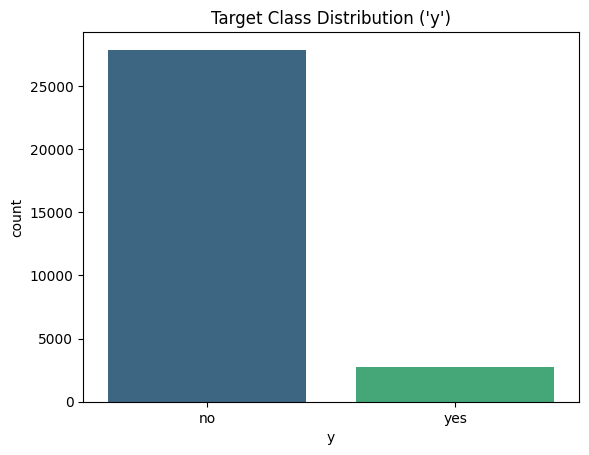

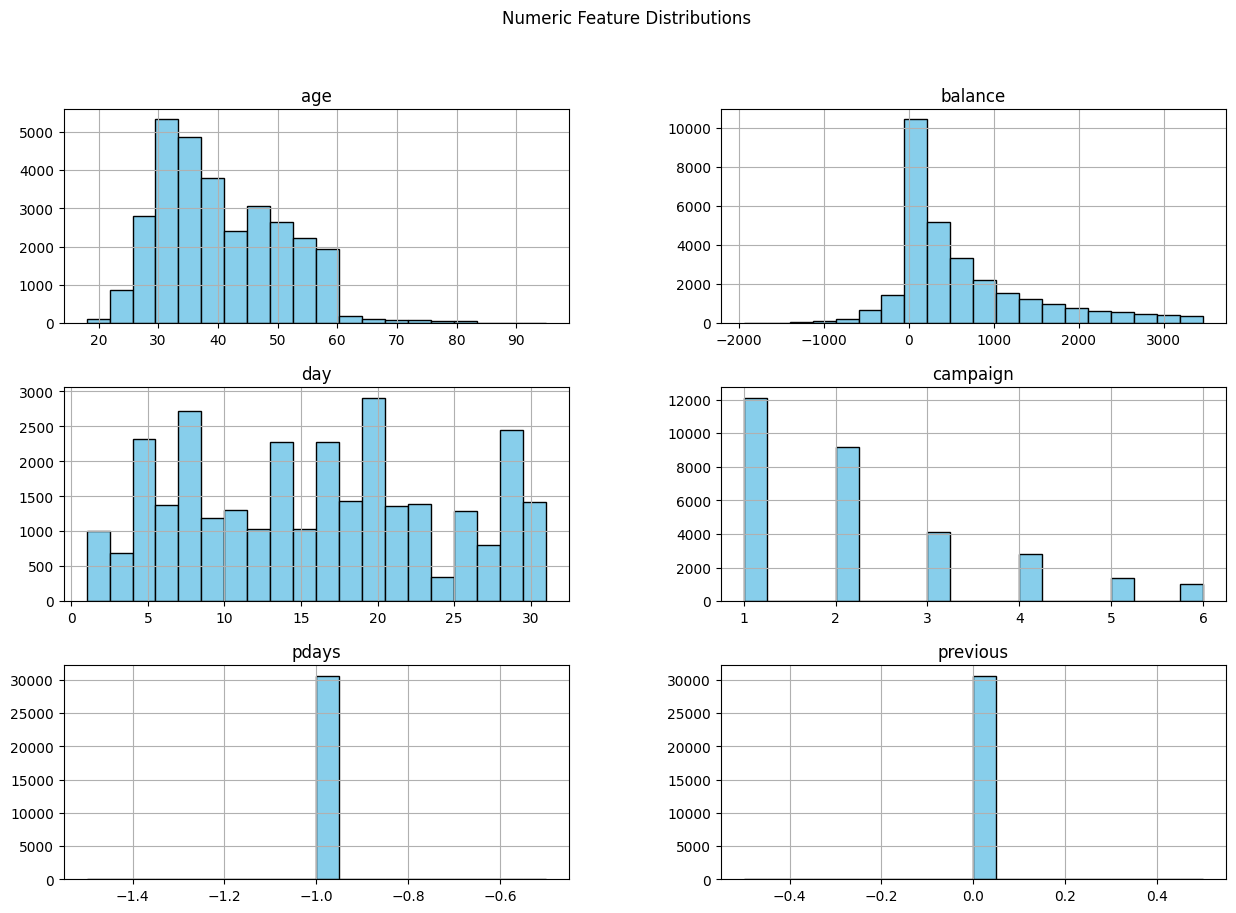


 CATEGORICAL FEATURE DISTRIBUTIONS 



<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


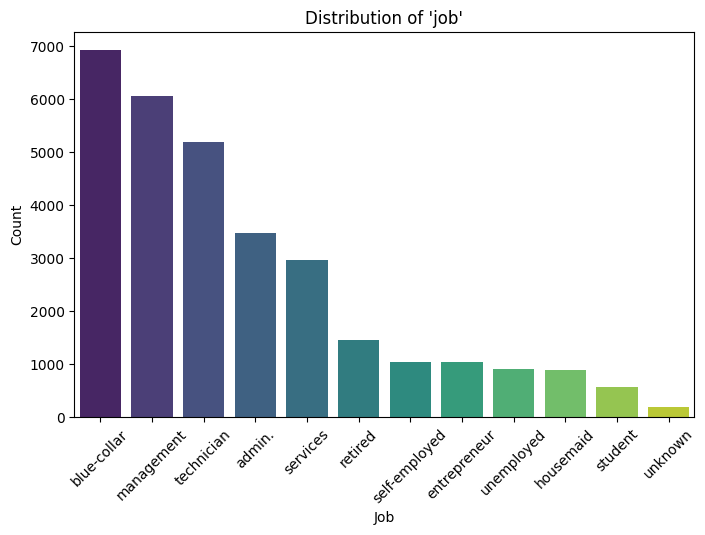

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


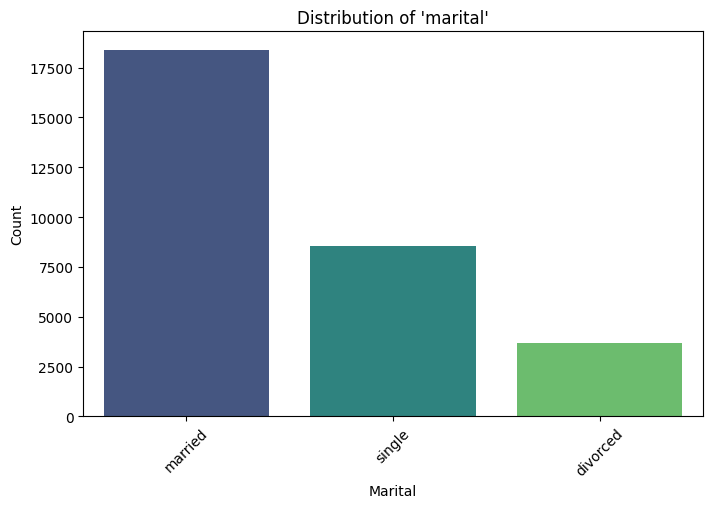

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


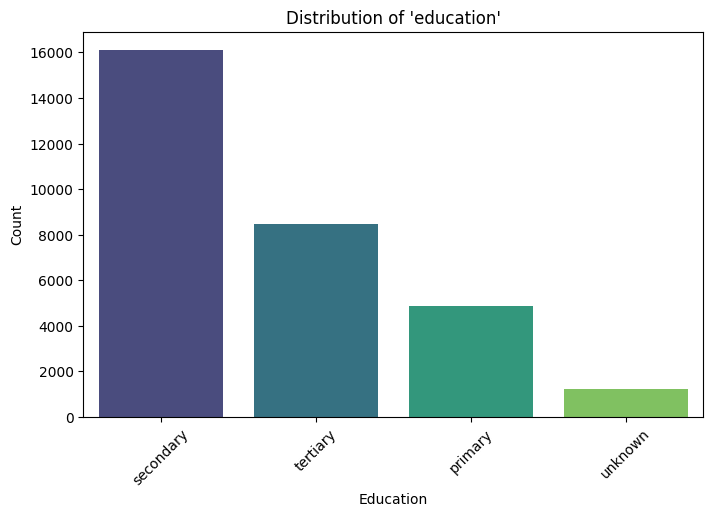

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


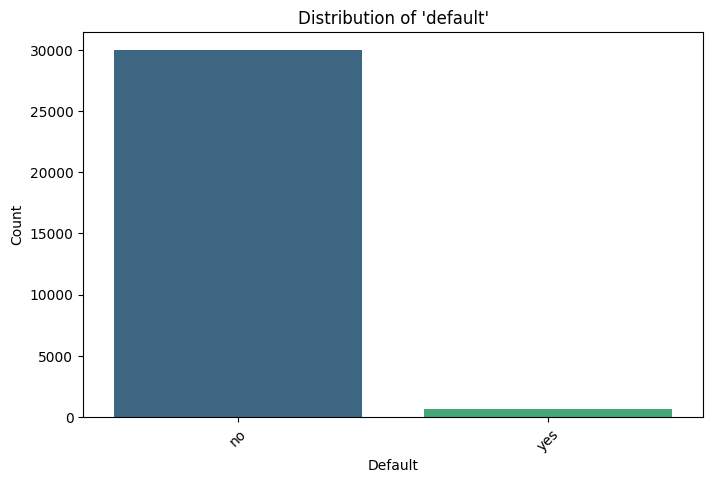

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


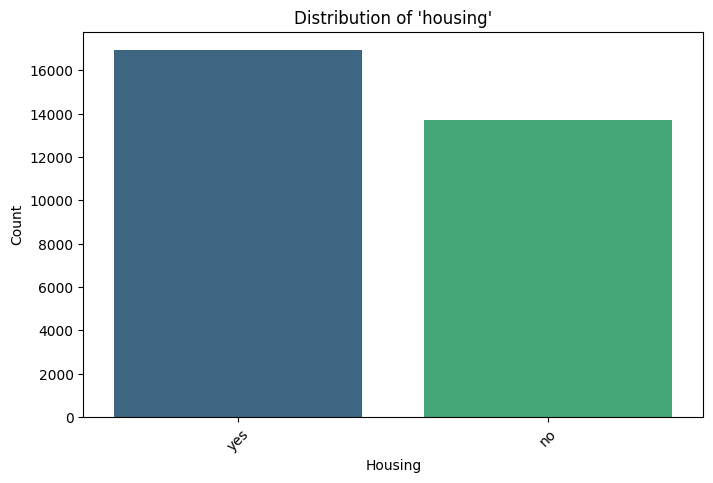

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


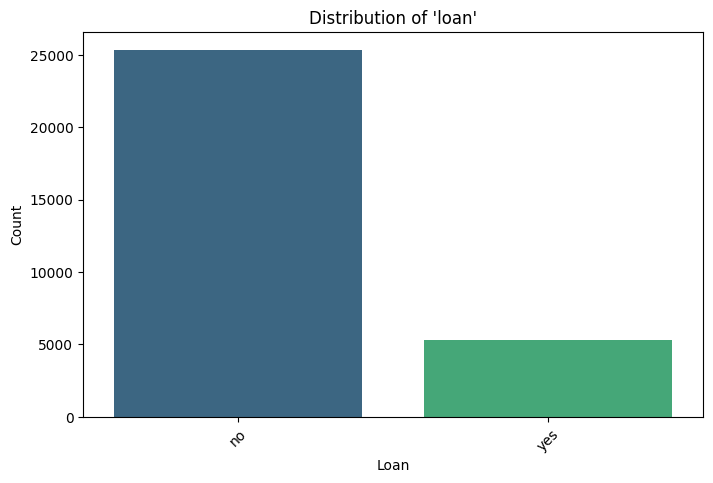

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


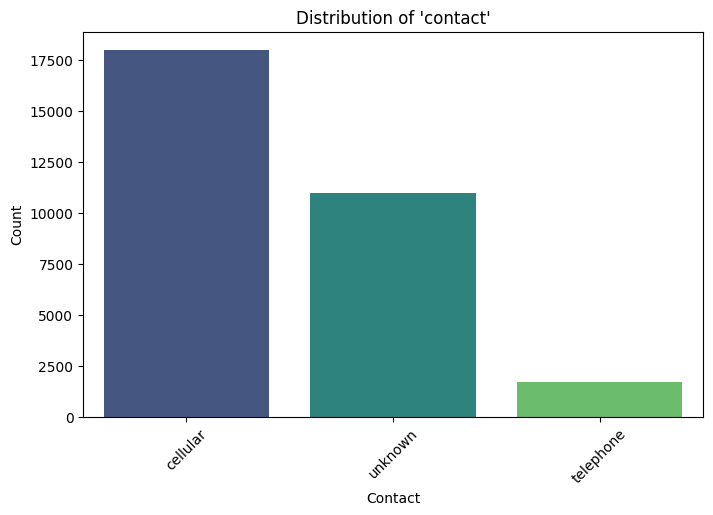

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


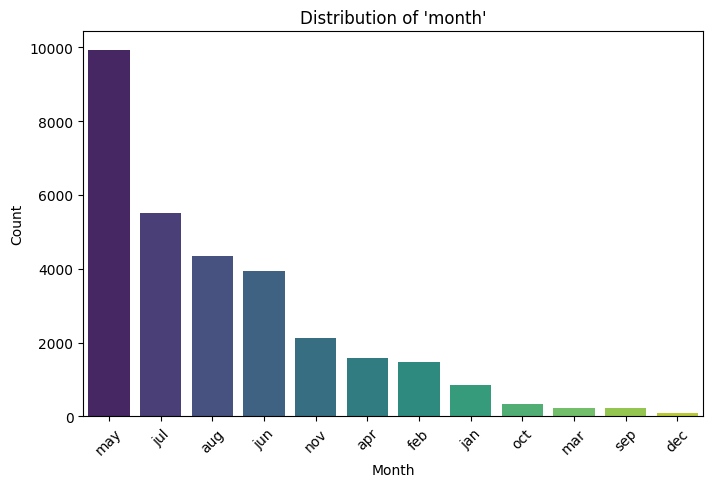

<ipython-input-10-540ac7634266>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


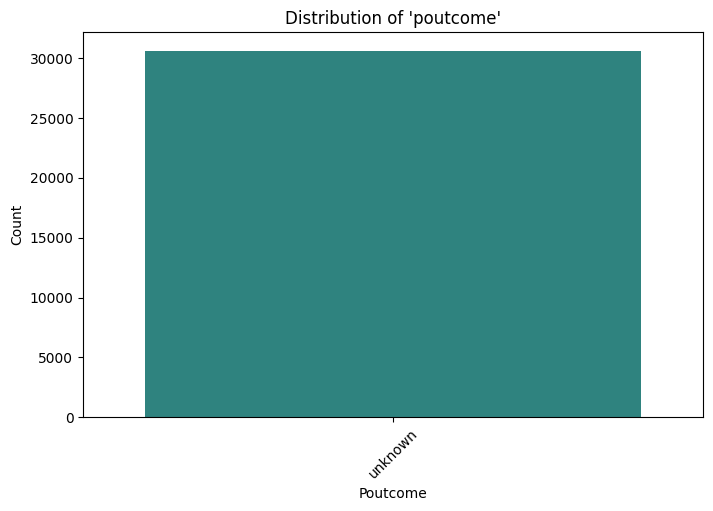

In [ ]:
# Visualizing the target class distribution
sns.countplot(x='y', data=df, palette='viridis')
plt.title("Target Class Distribution ('y')")
plt.show()

# Visualizing numeric column distributions
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions")
plt.show()

print("\n" + "="*50)
print(" CATEGORICAL FEATURE DISTRIBUTIONS ")
print("="*50 + "\n")

# Selecting categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Visualizing the distribution of each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Distribution of '{col}'")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Cleaning process

In [ ]:
# If there are any duplicates it is removed
df = df.drop_duplicates()
print(f"Dataset after removing duplicates: {df.shape}")
print("")

# If duration column exists, it is removed
if 'duration' in df.columns:
    df = df.drop('duration', axis=1)
    print("'duration' column has been removed.")
else:
    print("'duration' column not found in the dataset.")
print("")

# Selecting specific numeric columns for outlier detection
numeric_cols = ['balance', 'campaign', 'pdays', 'previous']

# Function to identify and remove outliers using Interquartile range(IQR)
def remove_outliers_iqr(df, columns):
    outlier_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1

        # Defining the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifying outliers
        outliers_below = df[df[col] < lower_bound]
        outliers_above = df[df[col] > upper_bound]
        total_outliers = len(outliers_below) + len(outliers_above)
        outlier_count[col] = total_outliers

        print(f"Column '{col}':")
        print(f"  Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
        print(f"  Lower bound = {lower_bound}, Upper bound = {upper_bound}")
        print(f"  Outliers below lower bound: {len(outliers_below)}")
        print(f"  Outliers above upper bound: {len(outliers_above)}")
        print(f"  Total outliers in '{col}': {total_outliers}")

        # Removing the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print("\nOutlier removal complete.")
    print(f"Number of rows remaining: {len(df)}")
    print("")
    return df, outlier_count

# Identifing and removing outliers
df_cleaned, outlier_summary = remove_outliers_iqr(df, numeric_cols)

# Saving the cleaned dataset
cleaned_file_path = "cleaned_bank_full.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

df = pd.read_csv(cleaned_file_path)

Dataset after removing duplicates: (45211, 17)

'duration' column has been removed.

Column 'balance':
  Q1 = 72.0, Q3 = 1428.0, IQR = 1356.0
  Lower bound = -1962.0, Upper bound = 3462.0
  Outliers below lower bound: 17
  Outliers above upper bound: 4712
  Total outliers in 'balance': 4729
Column 'campaign':
  Q1 = 1.0, Q3 = 3.0, IQR = 2.0
  Lower bound = -2.0, Upper bound = 6.0
  Outliers below lower bound: 0
  Outliers above upper bound: 2766
  Total outliers in 'campaign': 2766
Column 'pdays':
  Q1 = -1.0, Q3 = -1.0, IQR = 0.0
  Lower bound = -1.0, Upper bound = -1.0
  Outliers below lower bound: 0
  Outliers above upper bound: 7081
  Total outliers in 'pdays': 7081
Column 'previous':
  Q1 = 0.0, Q3 = 0.0, IQR = 0.0
  Lower bound = 0.0, Upper bound = 0.0
  Outliers below lower bound: 0
  Outliers above upper bound: 0
  Total outliers in 'previous': 0

Outlier removal complete.
Number of rows remaining: 30635

Cleaned dataset saved to cleaned_bank_full.csv


# Data Transformation

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Define data transformation function
def transform_data(df):
    # Selecting numeric and categorical columns
    numeric_cols = ['age', 'balance', 'campaign', 'pdays', 'previous', 'day']
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

    # Preprocessing for numeric and categorical columns
    transformer = ColumnTransformer(
        transformers=[
            ('num', MinMaxScaler(), numeric_cols),  # Min-Max Scaling for numeric columns
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # Encoding categorical columns
        ]
    )

    # Transforming the features
    transformed_data = transformer.fit_transform(df)

    # Creating a DataFrame with transformed features
    cat_feature_names = transformer.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_feature_names = numeric_cols + list(cat_feature_names)
    transformed_df = pd.DataFrame(transformed_data, columns=all_feature_names)

    return transformed_df

# Separating features (X) and target (y)
X = df.drop('y', axis=1)  # Features
y = df['y'].map({'yes': 1, 'no': 0})  # Encode target to 0/1

# Transforming the data
X_transformed = transform_data(df)

# Applying SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_transformed, y)

# Combining balanced features and target for saving
df_balanced = pd.concat([pd.DataFrame(X_balanced, columns=X_transformed.columns),
                         pd.Series(y_balanced, name='y')], axis=1)

# Saving the transformed and balanced dataset
transformed_file_path = "transformed_balanced_bank_full.csv"
df_balanced.to_csv(transformed_file_path, index=False)
print(f"Transformed and balanced dataset saved to {transformed_file_path}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Transformed and balanced dataset saved to transformed_balanced_bank_full.csv


In [ ]:
# Importing files to train the models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the transformed dataset
file_path = "transformed_balanced_bank_full.csv"
df_transformed = pd.read_csv(file_path)

# Spliting into features (X) and target (y)
X = df_transformed.drop('y', axis=1)  # Features
y = df_transformed['y']  # Target column

# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Training Random Forest

In [ ]:
print("Training Random Forest...")

# Initializes the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf_model.predict(X_test)

# Random Forest Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print("Classification Report (Random Forest):")

# Generating the classification report as a dictionary for detailed metric access
rf_metrics = classification_report(y_test, y_pred_rf, output_dict=True)

# Generating a classification report
print(classification_report(y_test, y_pred_rf))

Training Random Forest...
Random Forest Accuracy: 0.94
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5572
           1       0.95      0.93      0.94      5571

    accuracy                           0.94     11143
   macro avg       0.94      0.94      0.94     11143
weighted avg       0.94      0.94      0.94     11143



# Training Neural Network

In [ ]:
print("\nTraining Neural Network...")

# Initializing a Neural Network with 3 hidden layers, ReLU activation, Adam optimizer, and 500 max iterations
nn_model = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)

# Training the Neural Network model on the training data
nn_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_nn = nn_model.predict(X_test)

# Neural Network Accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)

print(f"Neural Network Accuracy: {nn_accuracy:.2f}")
print("Classification Report (Neural Network):")

# Generating the classification report as a dictionary for detailed metric access
nn_metrics = classification_report(y_test, y_pred_nn, output_dict=True)

# Generating a classification report
print(classification_report(y_test, y_pred_nn))


Training Neural Network...
Neural Network Accuracy: 0.89
Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      5572
           1       0.85      0.95      0.90      5571

    accuracy                           0.89     11143
   macro avg       0.90      0.89      0.89     11143
weighted avg       0.90      0.89      0.89     11143



# Comparing both models

In [ ]:
from sklearn.metrics import roc_auc_score

# Creating a comparison dictionary
comparison = {
    "Metric": ["Accuracy", "Precision (Class 0)", "Precision (Class 1)",
               "Recall (Class 0)", "Recall (Class 1)", "F1-Score (Class 0)",
               "F1-Score (Class 1)"],
    "Random Forest": [
        rf_accuracy, rf_metrics["0"]["precision"], rf_metrics["1"]["precision"],
        rf_metrics["0"]["recall"], rf_metrics["1"]["recall"],
        rf_metrics["0"]["f1-score"], rf_metrics["1"]["f1-score"]
    ],
    "Neural Network": [
        nn_accuracy, nn_metrics["0"]["precision"], nn_metrics["1"]["precision"],
        nn_metrics["0"]["recall"], nn_metrics["1"]["recall"],
        nn_metrics["0"]["f1-score"], nn_metrics["1"]["f1-score"]
    ]
}

# Displaying the comparison as a DataFrame
comparison_df = pd.DataFrame(comparison)
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                Metric  Random Forest  Neural Network
0             Accuracy       0.939693        0.891412
1  Precision (Class 0)       0.934243        0.948396
2  Precision (Class 1)       0.945283        0.847269
3     Recall (Class 0)       0.945980        0.827889
4     Recall (Class 1)       0.933405        0.954945
5   F1-Score (Class 0)       0.940075        0.884055
6   F1-Score (Class 1)       0.939306        0.897890


# ROC Curves for both models

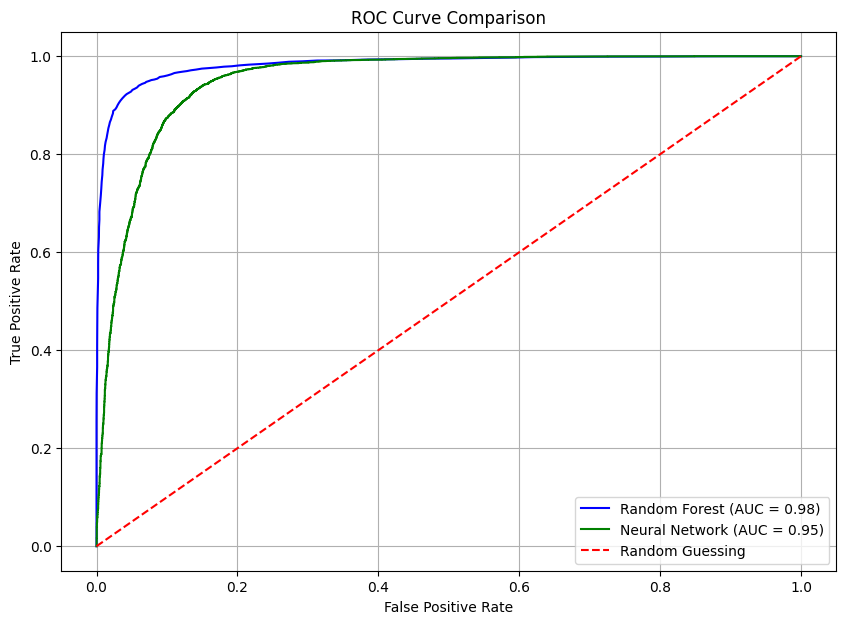

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve and AUC for Neural Network
nn_probs = nn_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
nn_auc = auc(nn_fpr, nn_tpr)

# Plotting ROC curves
plt.figure(figsize=(10, 7))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='blue')
plt.plot(nn_fpr, nn_tpr, label=f"Neural Network (AUC = {nn_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'r--', label="Random Guessing")  # Diagonal for random guessing
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()